# Applying Machine Learning Algorithm

## Linear Regression

In [33]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Reading the file

data= pd.read_csv('Data/Real-Data/Real_Combine.csv')
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM2.5
0,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61,1.3,8.7,22.2,200.645833


In [35]:
data.isnull().sum()

T        0
TM       0
Tm       0
SLP      0
H        0
VV       0
V        0
VM       0
PM2.5    0
dtype: int64

<AxesSubplot:>

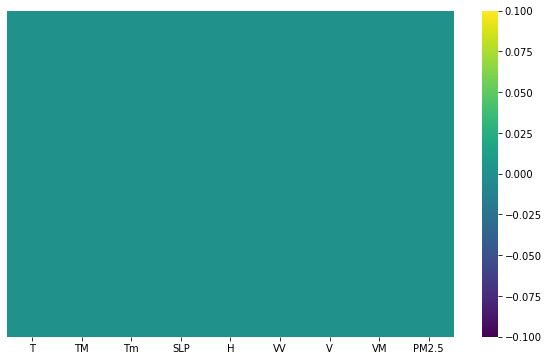

In [36]:
# Check for null values through visualisation
# All the null values were removed as part of code
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

In [37]:
# Verifying the data types of all the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1089 non-null   float64
 1   TM      1089 non-null   float64
 2   Tm      1089 non-null   float64
 3   SLP     1089 non-null   float64
 4   H       1089 non-null   int64  
 5   VV      1089 non-null   float64
 6   V       1089 non-null   float64
 7   VM      1089 non-null   float64
 8   PM2.5   1089 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 76.7 KB


In [38]:
# Verifying the dimensions of data frame
data.shape

(1089, 9)

In [39]:
# Dividing the data in Dependent and Independent Features

x_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1]


In [40]:
# Verify Independent features

x_data.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61,1.3,8.7,22.2


In [41]:
# Verify Dependent Features

y_data.head()

0    219.720833
1    182.187500
2    154.037500
3    223.208333
4    200.645833
Name: PM2.5, dtype: float64

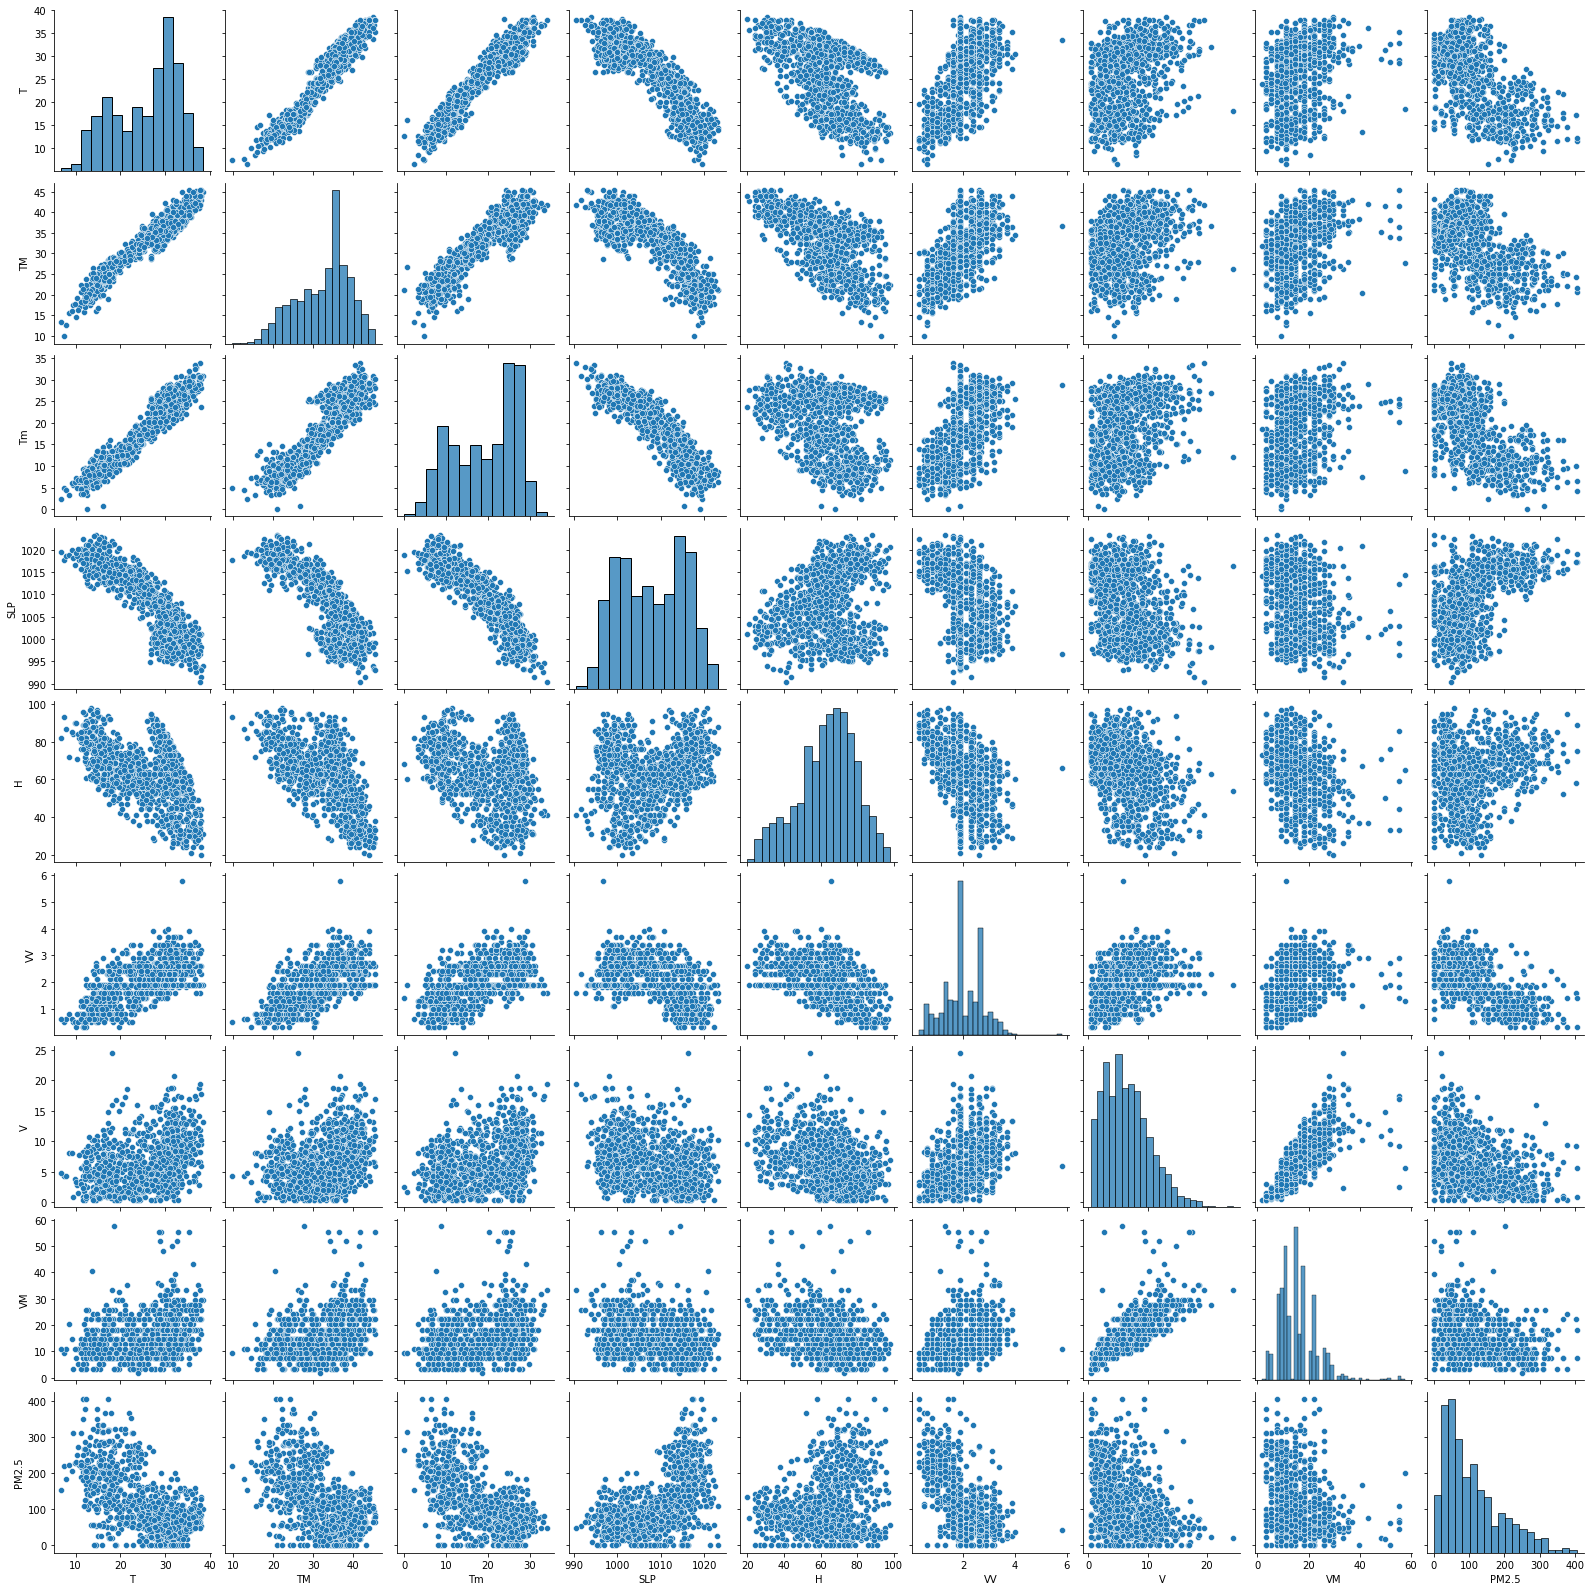

In [42]:
# Verifying the correlation of all the features via plotting
sns.pairplot(data)

In [43]:
# Verifying the strength of correlation of all the features
data.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM2.5
T,1.000000,0.963449,0.957201,-0.883486,-0.490205,0.625555,0.320452,0.277059,-0.628969
TM,0.963449,1.000000,0.889894,-0.826497,-0.578128,0.598582,0.303434,0.286205,-0.564433
Tm,0.957201,0.889894,1.000000,-0.912356,-0.276291,0.547673,0.312404,0.244846,-0.661353
SLP,-0.883486,-0.826497,-0.912356,1.000000,0.234018,-0.483668,-0.326082,-0.269664,0.604863
H,-0.490205,-0.578128,-0.276291,0.234018,1.000000,-0.489742,-0.356407,-0.369083,0.166341
VV,0.625555,0.598582,0.547673,-0.483668,-0.489742,1.000000,0.369990,0.326173,-0.593240
V,0.320452,0.303434,0.312404,-0.326082,-0.356407,0.369990,1.000000,0.780994,-0.327888
VM,0.277059,0.286205,0.244846,-0.269664,-0.369083,0.326173,0.780994,1.000000,-0.262803
PM2.5,-0.628969,-0.564433,-0.661353,0.604863,0.166341,-0.593240,-0.327888,-0.262803,1.000000


# Correlation Matrix

<AxesSubplot:>

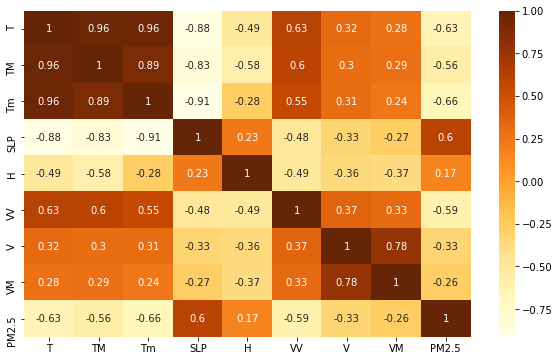

In [44]:
# Updating the correlation status in heat map for clear understanding
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='YlOrBr')

# Feature Importance
Thsi is required only when we have many featute, Here we are simply trying to understand the concept of feature importance.

In [45]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(x_data,y_data)
print (model.feature_importances_)

[0.18184651 0.0842183  0.18491268 0.15693696 0.07896055 0.20929757
 0.05804013 0.04578731]


In [46]:
# Create feature importance data series
imp_feature = pd.Series(model.feature_importances_, index=x_data.columns)

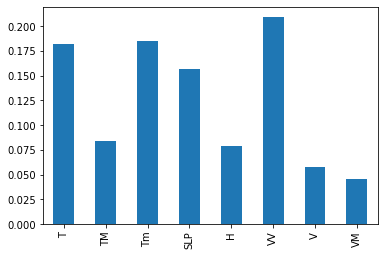

In [47]:
# Plot of all feature
imp_feature.plot(kind='bar')
plt.show()

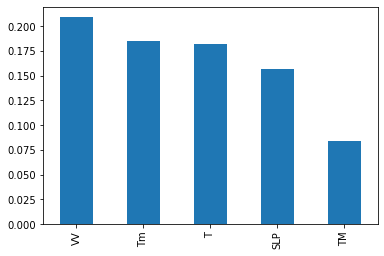

In [48]:
# Plot of 5 Important feature
imp_feature.nlargest(5).plot(kind='bar')
plt.show()

# Linear Regression Model

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

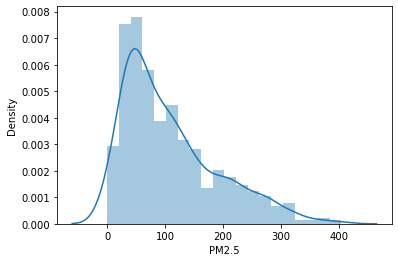

In [49]:
# The Dependent featute looks right skewed
sns.distplot(y_data)

## Test and train data split

In [50]:
# spliting the test and train data, where train data = 70% and test = 30%

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data, test_size=0.3)

In [51]:
# Lets validate the number of records after the split, both train and test should be having same records

#Shape of Training data
print (x_train.shape)
print (y_train.shape)

#Shape of Test data
print (x_test.shape)
print (y_test.shape)

(762, 8)
(762,)
(327, 8)
(327,)


In [52]:
# Lets create a linear regression model
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(x_train,y_train)


LinearRegression()

### R square for Test data

In [53]:
# Lets verify the R sqaure value for the test data , Rsqare should be nearer to 1
print(regression_model.score(x_train,y_train))

0.5443757408660227


### R square for Training data

In [54]:
# Lets verify the R sqaure value for the Train data , Rsqare should be nearer to 1
print(regression_model.score(x_test,y_test))

0.5402961516355941


R square value for both Train and test data almost same, but still this is not a best model to solve

# Performing K folding cross validation

In [55]:
from sklearn.model_selection import cross_val_score

# Below will displaythe R square value for all the 10 folds cross validation

r_square_series = pd.Series(cross_val_score(regression_model,x_data,y_data,cv=3), index=range(1,4))
print (r_square_series)

1    0.536555
2    0.553588
3    0.434088
dtype: float64


In [56]:
# The final mean for test data will be 
print (r_square_series.mean())

0.5080769456539556


### Model Evaluation

In [57]:
# Lets print the Intercept and slope for the regression model created

print ("Intercept is ::" + str(regression_model.intercept_))

Intercept is ::-179.87365805975782


In [58]:
coeff_df = pd.DataFrame(regression_model.coef_, index=x_data.columns, columns=["Coefficient"])

In [59]:
for index, row in coeff_df.iterrows() :
    if (row["Coefficient"] > 0 ):
        print ("Holding Other values fixed, For every 1 unit increase in " +index+ " is associated with a increase of " +str(row["Coefficient"])+ " in PM2.5")
    else:
        print ("Holding Other values fixed, For every 1 unit increase in " +index+ " is associated with a decrease of " +str(row["Coefficient"])+ " in PM2.5")

Holding Other values fixed, For every 1 unit increase in T is associated with a increase of 0.22983365214273094 in PM2.5
Holding Other values fixed, For every 1 unit increase in TM is associated with a increase of 1.4948375563104754 in PM2.5
Holding Other values fixed, For every 1 unit increase in Tm is associated with a decrease of -5.528682224998274 in PM2.5
Holding Other values fixed, For every 1 unit increase in SLP is associated with a increase of 0.4989455632742622 in PM2.5
Holding Other values fixed, For every 1 unit increase in H is associated with a decrease of -0.7604426120451099 in PM2.5
Holding Other values fixed, For every 1 unit increase in VV is associated with a decrease of -48.46499863694377 in PM2.5
Holding Other values fixed, For every 1 unit increase in V is associated with a decrease of -1.0000557023726766 in PM2.5
Holding Other values fixed, For every 1 unit increase in VM is associated with a decrease of -0.664554821595082 in PM2.5


C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

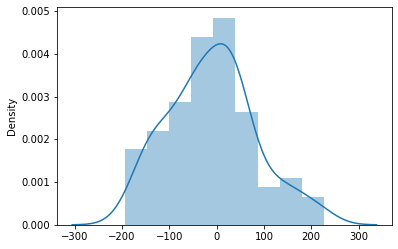

In [60]:
# Lets predict x_test and compare it with actual values
predicted_vals = pd.Series(regression_model.predict(x_test))

sns.distplot(y_test-predicted_vals)


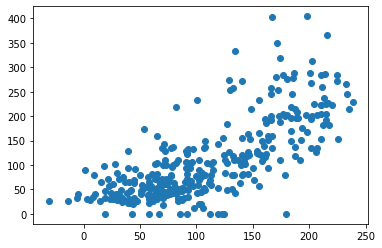

In [61]:
plt.scatter(predicted_vals,y_test)

## Lets show the metrics

In [62]:
from sklearn import metrics
print("MAE::::", metrics.mean_absolute_error(y_test,predicted_vals))
print("MSE::::", metrics.mean_squared_error(y_test,predicted_vals))
print("RMSE::::", np.sqrt(metrics.mean_squared_error(y_test,predicted_vals)))

MAE:::: 40.31137879952531
MSE:::: 3023.848355874098
RMSE:::: 54.98952951129968


## Creating a pickled file

In [64]:
import pickle
pickle_file = open("linearRegression.pkl", 'wb')
pickle.dump(regression_model,pickle_file)